# 01 - Data Exploration

This notebook demonstrates the synthetic data generation capabilities of the `volume_forecast` package and performs exploratory data analysis on the generated data.

## Objectives
1. Generate 2 years of synthetic login and deposit volume data
2. Save the data for use in subsequent notebooks
3. Explore patterns in the data:
   - Basic statistics
   - Time series visualization
   - Day-of-week patterns
   - Monthly seasonality
   - Correlation analysis

## Setup

Import required libraries and configure visualization settings.

In [1]:
from datetime import date
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import our package
from volume_forecast.data_generation import VolumeGenerator

# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

## 1. Generate Synthetic Data

Use the `VolumeGenerator` class to create 2 years of synthetic daily volume data (2023-01-01 to 2024-12-31).

The generator creates realistic data with:
- Day-of-week patterns (weekends higher than weekdays)
- Monthly seasonality (peaks during major sporting events)
- Event-based spikes (holidays, static events)
- Correlated noise between logins and deposits

In [2]:
# Initialize the generator with reproducible seed
generator = VolumeGenerator(seed=42)

# Generate 2 years of data
start_date = date(2023, 1, 1)
end_date = date(2024, 12, 31)

df = generator.generate(start_date=start_date, end_date=end_date)

print(f"Generated {len(df):,} days of data")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
df.head(10)

Generated 731 days of data
Date range: 2023-01-01 to 2024-12-31


,date,daily_logins,daily_deposits,daily_deposit_volume_gbp
0,2023-01-01,59273,9648,267406
1,2023-01-02,39425,7242,234617
2,2023-01-03,45752,6452,234713
3,2023-01-04,49327,7341,224131
4,2023-01-05,37494,7282,204090
5,2023-01-06,45989,8870,228493
6,2023-01-07,68889,12483,305571
7,2023-01-08,56168,8149,244559
8,2023-01-09,44540,5219,225862
9,2023-01-10,37734,7133,238126


## 2. Save Data to CSV

Save the generated data to the `data/raw/` directory for use in subsequent notebooks.

In [3]:
# Define output path
output_path = Path('../data/raw/synthetic_volumes.csv')

# Use the generator's save method (creates parent directories and metadata)
generator.save(df, output_path)

print(f"Data saved to: {output_path.resolve()}")
print(f"Metadata saved to: {output_path.with_suffix('.meta.json').resolve()}")

Data saved to: C:\Users\juanlu\dev\volume-forecasting-poc\data\raw\synthetic_volumes.csv
Metadata saved to: C:\Users\juanlu\dev\volume-forecasting-poc\data\raw\synthetic_volumes.meta.json


## 3. Basic Statistics

Examine the distribution and summary statistics of the generated data.

In [4]:
# Convert date column to datetime for analysis
df['date'] = pd.to_datetime(df['date'])

# Display basic statistics
print("=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
df.describe()

SUMMARY STATISTICS


,date,daily_logins,daily_deposits,daily_deposit_volume_gbp
count,731,731.00,731.00,731.00
mean,2024-01-01 00:00:00,"53,162.94","8,914.91","264,106.77"
min,2023-01-01 00:00:00,"23,749.00","3,085.00","122,017.00"
25%,2023-07-02 12:00:00,"41,954.50","6,681.00","205,804.50"
50%,2024-01-01 00:00:00,"48,708.00","7,800.00","240,062.00"
75%,2024-07-01 12:00:00,"58,406.50","9,617.00","293,004.50"
max,2024-12-31 00:00:00,"220,029.00","57,377.00","1,029,520.00"
std,NaN,"19,731.36","4,722.64","99,177.18"


In [5]:
# Additional statistics
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nMemory Usage:")
print(f"{df.memory_usage(deep=True).sum() / 1024:.2f} KB")


Data Types:
date                        datetime64[ns]
daily_logins                         int64
daily_deposits                       int64
daily_deposit_volume_gbp             int64
dtype: object

Missing Values:
date                        0
daily_logins                0
daily_deposits              0
daily_deposit_volume_gbp    0
dtype: int64

Memory Usage:
22.97 KB


## 4. Time Series Visualization

### 4.1 Daily Logins Over Time

Visualize the daily login patterns to identify trends and seasonality.

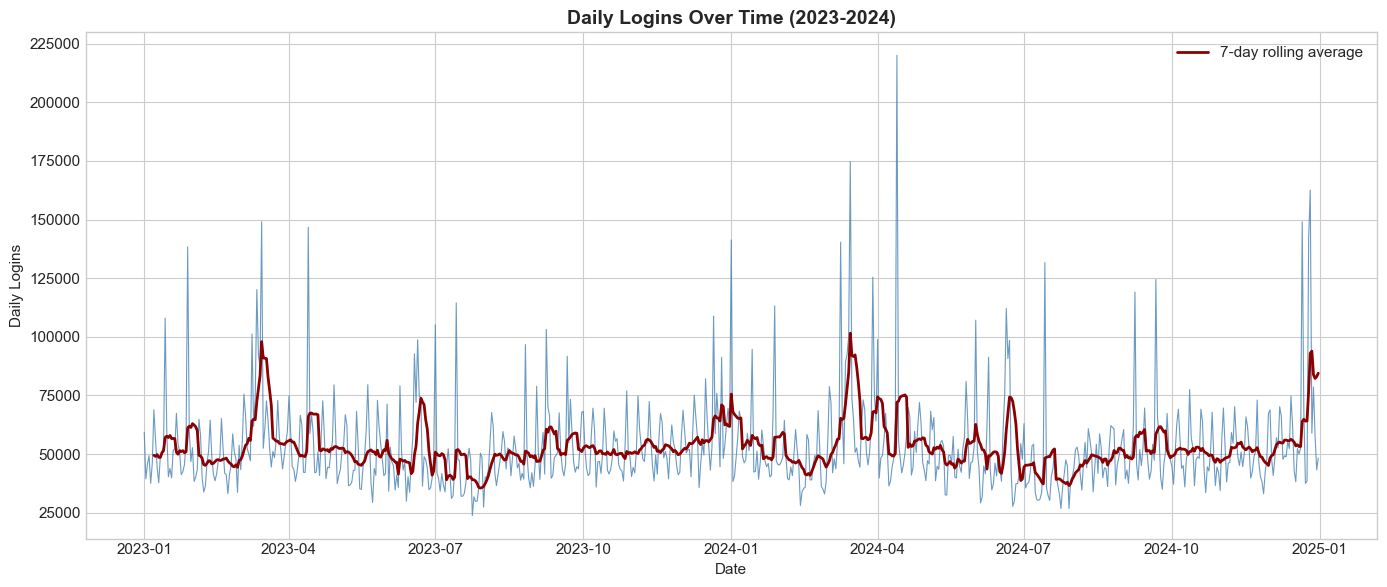

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['date'], df['daily_logins'], linewidth=0.8, alpha=0.8, color='steelblue')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Logins')
ax.set_title('Daily Logins Over Time (2023-2024)', fontsize=14, fontweight='bold')

# Add a 7-day rolling average
rolling_avg = df['daily_logins'].rolling(window=7).mean()
ax.plot(df['date'], rolling_avg, linewidth=2, color='darkred', label='7-day rolling average')
ax.legend()

plt.tight_layout()
plt.show()

### 4.2 Daily Deposits Over Time

Visualize the daily deposit count patterns.

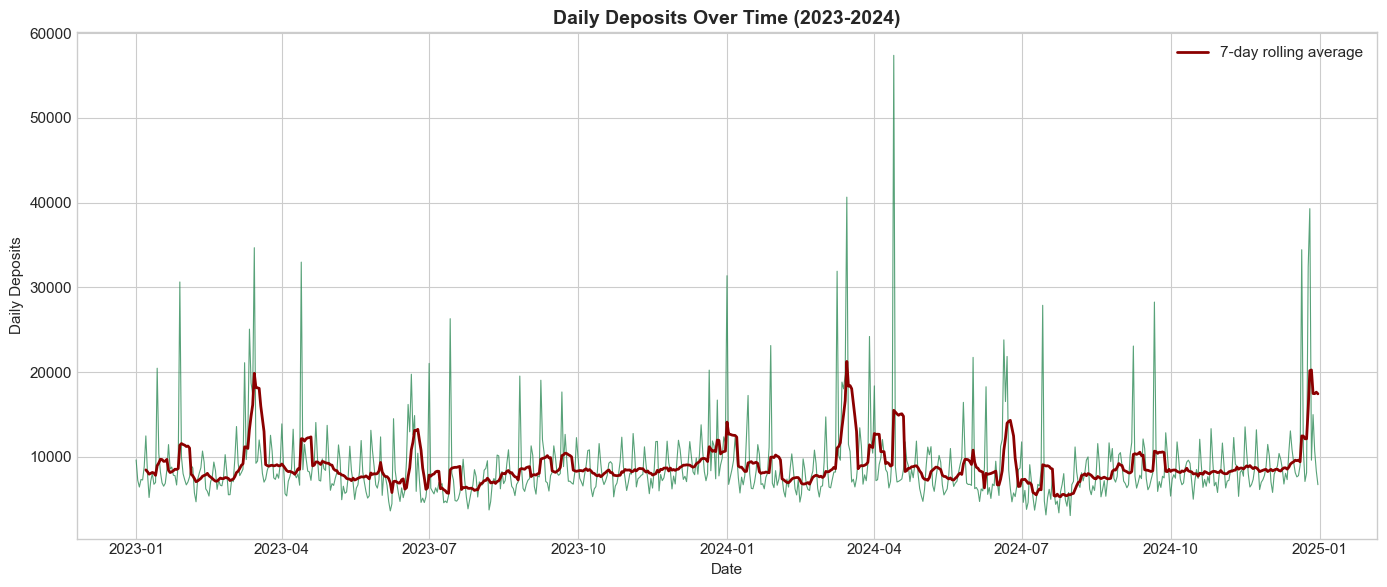

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['date'], df['daily_deposits'], linewidth=0.8, alpha=0.8, color='seagreen')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Deposits')
ax.set_title('Daily Deposits Over Time (2023-2024)', fontsize=14, fontweight='bold')

# Add a 7-day rolling average
rolling_avg = df['daily_deposits'].rolling(window=7).mean()
ax.plot(df['date'], rolling_avg, linewidth=2, color='darkred', label='7-day rolling average')
ax.legend()

plt.tight_layout()
plt.show()

### 4.3 Combined View: Logins and Deposits

Compare logins and deposits side by side to observe correlation patterns.

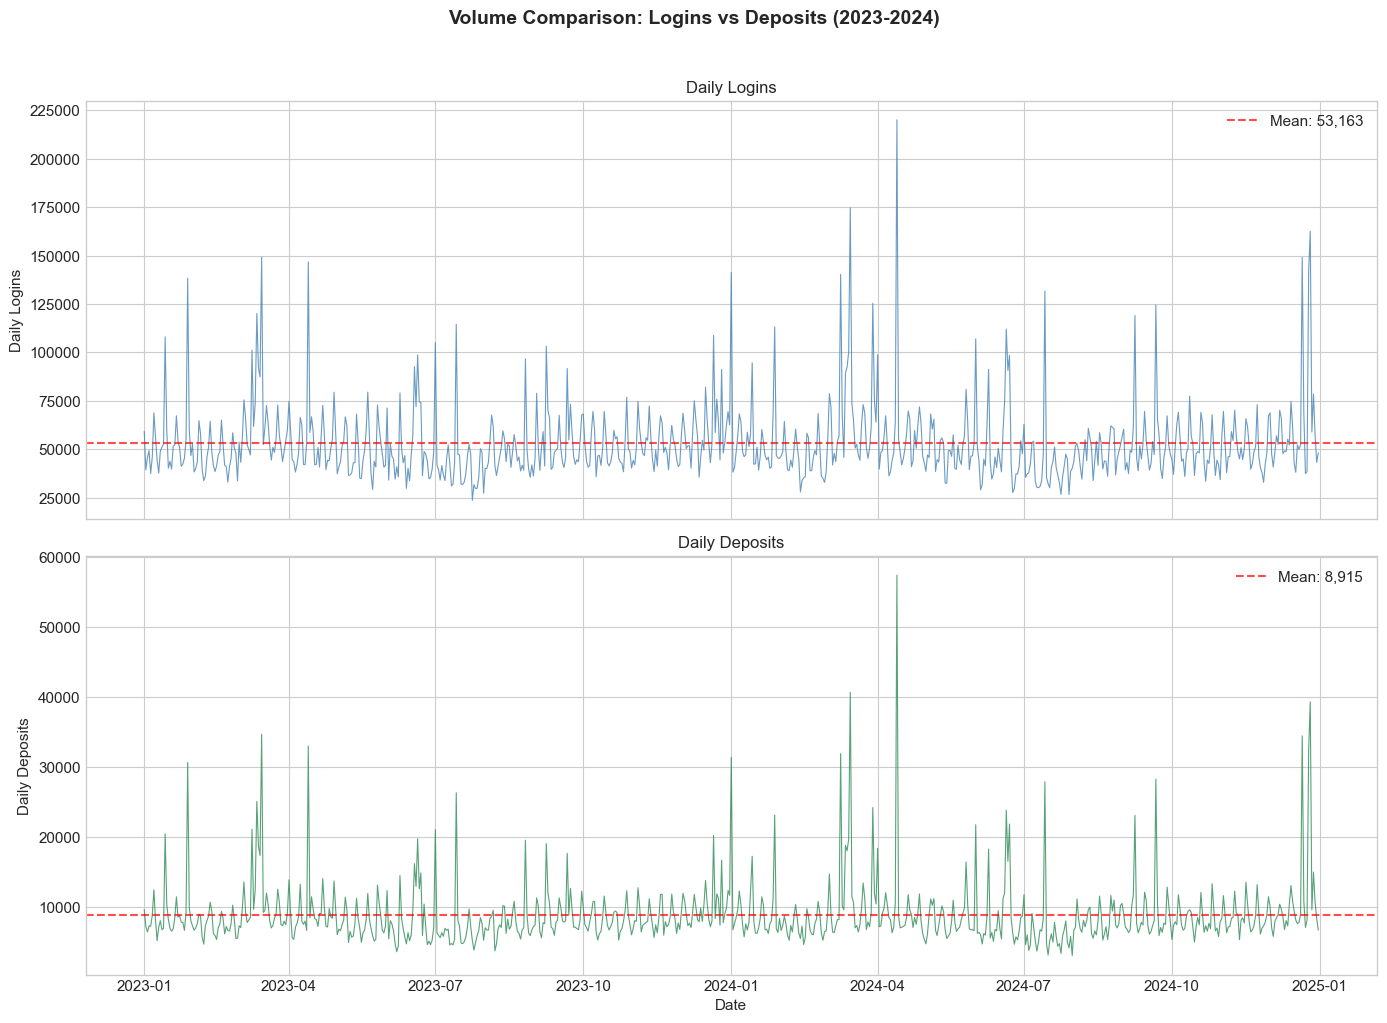

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Logins
axes[0].plot(df['date'], df['daily_logins'], linewidth=0.8, alpha=0.8, color='steelblue')
axes[0].set_ylabel('Daily Logins')
axes[0].set_title('Daily Logins', fontsize=12)
axes[0].axhline(df['daily_logins'].mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {df["daily_logins"].mean():,.0f}')
axes[0].legend()

# Deposits
axes[1].plot(df['date'], df['daily_deposits'], linewidth=0.8, alpha=0.8, color='seagreen')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Daily Deposits')
axes[1].set_title('Daily Deposits', fontsize=12)
axes[1].axhline(df['daily_deposits'].mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {df["daily_deposits"].mean():,.0f}')
axes[1].legend()

plt.suptitle('Volume Comparison: Logins vs Deposits (2023-2024)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 5. Day-of-Week Patterns

Analyze how volumes vary by day of the week. The synthetic data is designed to have:
- Highest activity on Saturdays (multiplier: 1.30)
- Elevated activity on Sundays and Fridays
- Lower activity on weekdays, especially Tuesday

C:\Users\juanlu\AppData\Local\Temp\ipykernel_18128\2443615630.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_name', y='daily_logins', order=day_order, ax=axes[0], palette='Blues')
C:\Users\juanlu\AppData\Local\Temp\ipykernel_18128\2443615630.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_name', y='daily_deposits', order=day_order, ax=axes[1], palette='Greens')


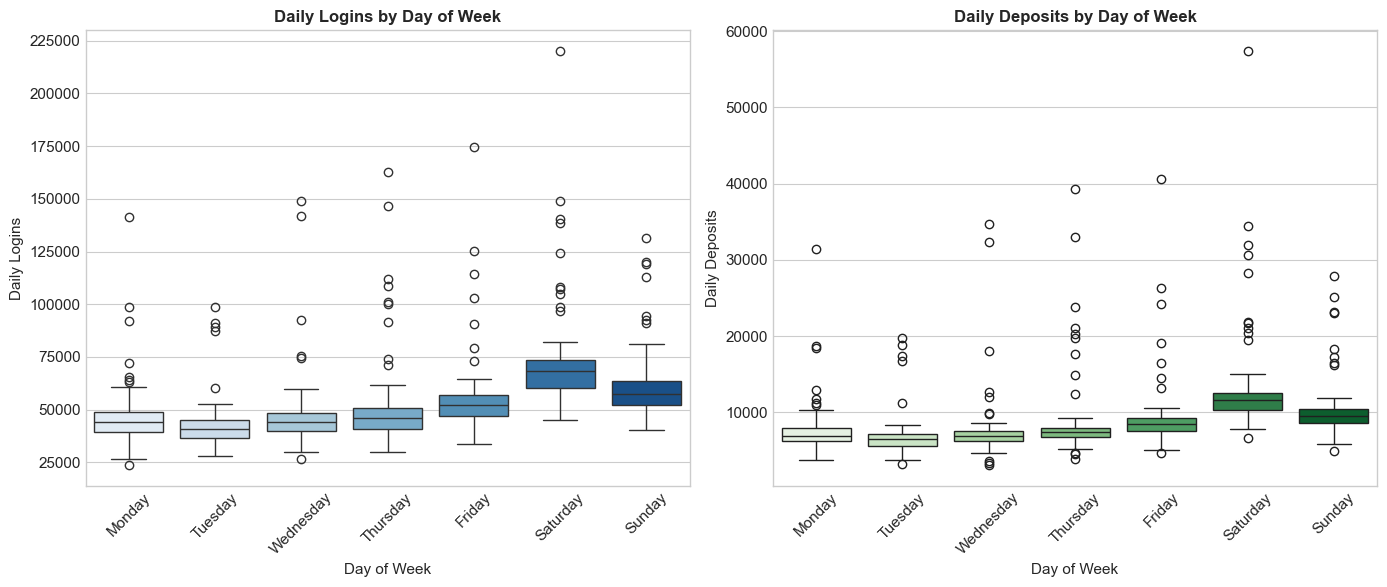

In [9]:
# Add day-of-week column
df['day_of_week'] = df['date'].dt.dayofweek
df['day_name'] = df['date'].dt.day_name()

# Order days correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logins boxplot
sns.boxplot(data=df, x='day_name', y='daily_logins', order=day_order, ax=axes[0], palette='Blues')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Daily Logins')
axes[0].set_title('Daily Logins by Day of Week', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Deposits boxplot
sns.boxplot(data=df, x='day_name', y='daily_deposits', order=day_order, ax=axes[1], palette='Greens')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Daily Deposits')
axes[1].set_title('Daily Deposits by Day of Week', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [10]:
# Summary statistics by day of week
print("Average Daily Logins by Day of Week:")
print(df.groupby('day_name')['daily_logins'].mean().reindex(day_order).round(0))
print("\nAverage Daily Deposits by Day of Week:")
print(df.groupby('day_name')['daily_deposits'].mean().reindex(day_order).round(0))

Average Daily Logins by Day of Week:
day_name
Monday      46,151.00
Tuesday     42,558.00
Wednesday   46,422.00
Thursday    50,550.00
Friday      54,750.00
Saturday    71,544.00
Sunday      60,266.00
Name: daily_logins, dtype: float64

Average Daily Deposits by Day of Week:
day_name
Monday       7,460.00
Tuesday      6,870.00
Wednesday    7,479.00
Thursday     8,470.00
Friday       9,140.00
Saturday    12,890.00
Sunday      10,116.00
Name: daily_deposits, dtype: float64


## 6. Monthly Patterns

Analyze monthly seasonality. The synthetic data includes:
- Peak months: March (Cheltenham), April (Grand National), December (Christmas)
- Low months: June, July (summer lull)

C:\Users\juanlu\AppData\Local\Temp\ipykernel_18128\465698126.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month_name', y='daily_logins', order=month_order, ax=axes[0], palette='coolwarm')
C:\Users\juanlu\AppData\Local\Temp\ipykernel_18128\465698126.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month_name', y='daily_deposits', order=month_order, ax=axes[1], palette='coolwarm')


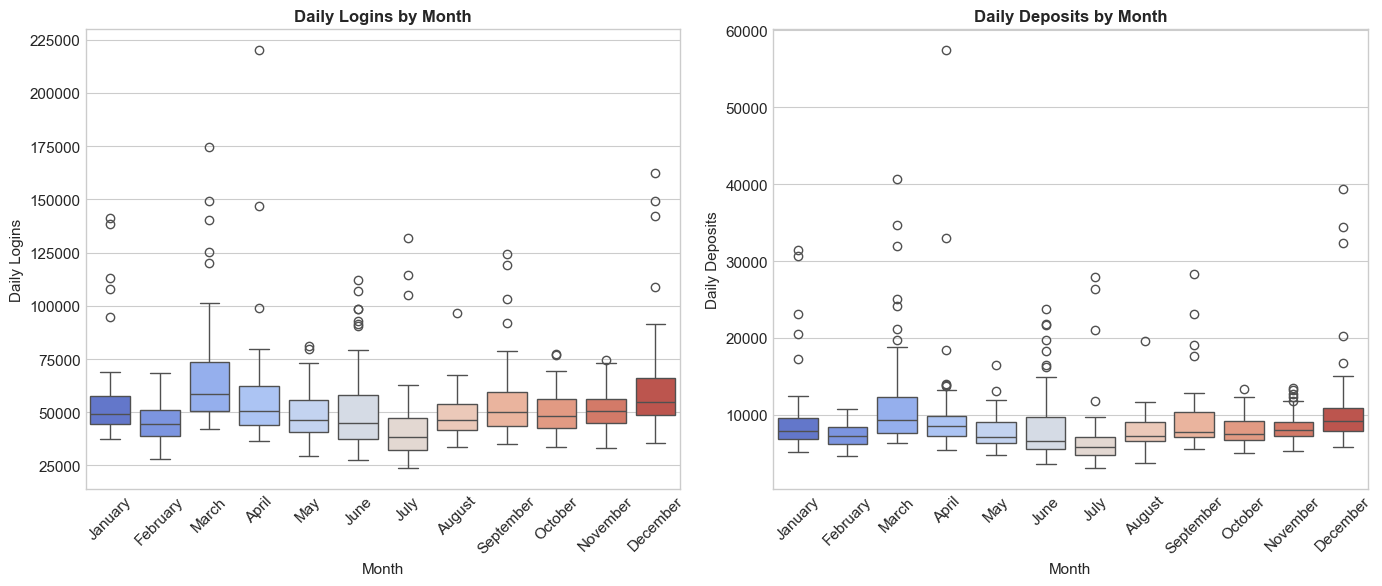

In [11]:
# Add month column
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()

# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logins boxplot
sns.boxplot(data=df, x='month_name', y='daily_logins', order=month_order, ax=axes[0], palette='coolwarm')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Daily Logins')
axes[0].set_title('Daily Logins by Month', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Deposits boxplot
sns.boxplot(data=df, x='month_name', y='daily_deposits', order=month_order, ax=axes[1], palette='coolwarm')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Daily Deposits')
axes[1].set_title('Daily Deposits by Month', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

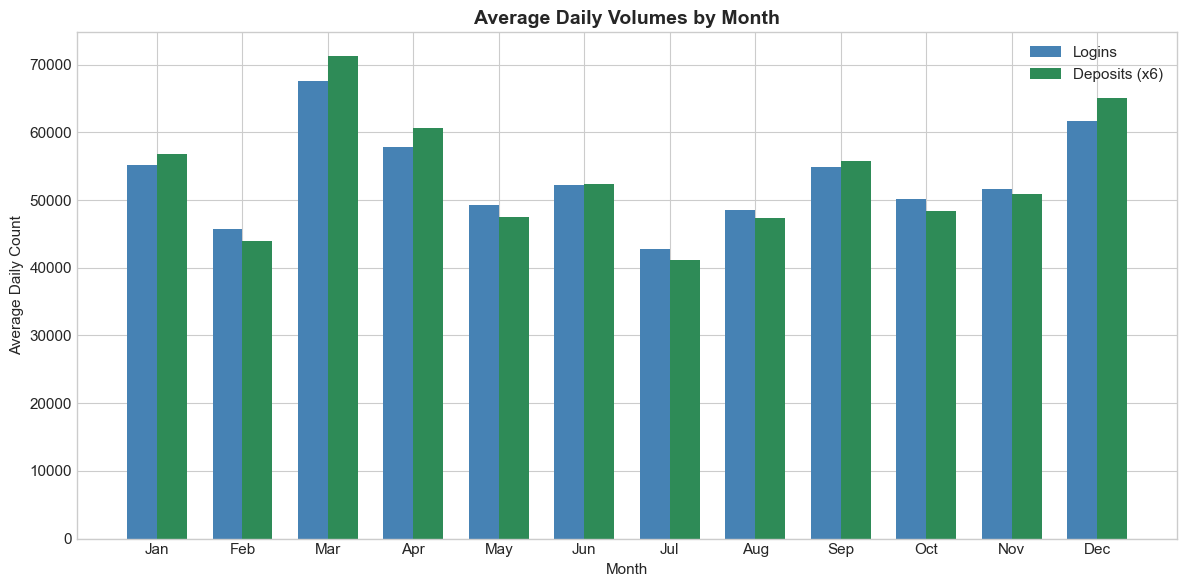

In [12]:
# Monthly averages bar chart
monthly_avg = df.groupby('month_name')[['daily_logins', 'daily_deposits']].mean().reindex(month_order)

fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(month_order))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], monthly_avg['daily_logins'], width, label='Logins', color='steelblue')
bars2 = ax.bar([i + width/2 for i in x], monthly_avg['daily_deposits'] * 6, width, label='Deposits (x6)', color='seagreen')

ax.set_xlabel('Month')
ax.set_ylabel('Average Daily Count')
ax.set_title('Average Daily Volumes by Month', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([m[:3] for m in month_order])
ax.legend()

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

Examine the relationship between logins and deposits. The synthetic data is designed to have approximately 70% correlation between these metrics.

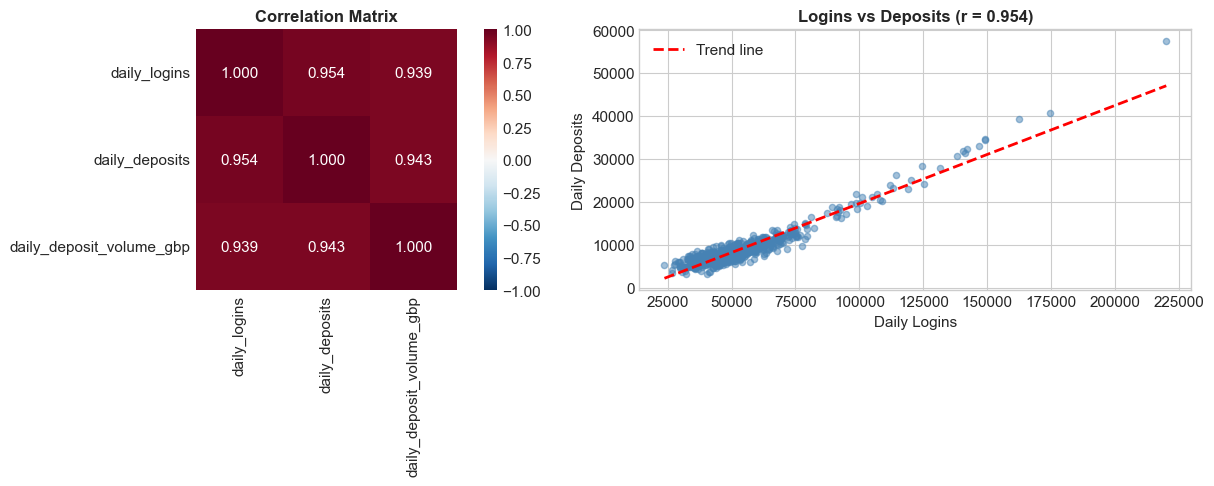

In [13]:
# Correlation matrix
numeric_cols = ['daily_logins', 'daily_deposits', 'daily_deposit_volume_gbp']
correlation_matrix = df[numeric_cols].corr()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, ax=axes[0], fmt='.3f', vmin=-1, vmax=1)
axes[0].set_title('Correlation Matrix', fontsize=12, fontweight='bold')

# Scatter plot: Logins vs Deposits
axes[1].scatter(df['daily_logins'], df['daily_deposits'], alpha=0.5, s=20, c='steelblue')
axes[1].set_xlabel('Daily Logins')
axes[1].set_ylabel('Daily Deposits')
axes[1].set_title(f'Logins vs Deposits (r = {df["daily_logins"].corr(df["daily_deposits"]):.3f})', 
                  fontsize=12, fontweight='bold')

# Add trend line
import numpy as np
z = np.polyfit(df['daily_logins'], df['daily_deposits'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['daily_logins'].min(), df['daily_logins'].max(), 100)
axes[1].plot(x_line, p(x_line), 'r--', linewidth=2, label='Trend line')
axes[1].legend()

plt.tight_layout()
plt.show()

In [14]:
# Print correlation values
print("Correlation Analysis")
print("=" * 50)
print(f"\nLogins vs Deposits:           {df['daily_logins'].corr(df['daily_deposits']):.4f}")
print(f"Logins vs Deposit Volume:     {df['daily_logins'].corr(df['daily_deposit_volume_gbp']):.4f}")
print(f"Deposits vs Deposit Volume:   {df['daily_deposits'].corr(df['daily_deposit_volume_gbp']):.4f}")

Correlation Analysis

Logins vs Deposits:           0.9542
Logins vs Deposit Volume:     0.9392
Deposits vs Deposit Volume:   0.9435


## 8. Summary

This notebook has demonstrated:

1. **Data Generation**: Successfully generated 2 years of synthetic volume data using the `VolumeGenerator` class.

2. **Data Characteristics**:
   - 731 days of data (2023-01-01 to 2024-12-31)
   - Three target variables: daily_logins, daily_deposits, daily_deposit_volume_gbp
   - No missing values

3. **Patterns Identified**:
   - **Day-of-week**: Clear weekly pattern with Saturday peaks and Tuesday troughs
   - **Seasonality**: Monthly variation with peaks in March (Cheltenham) and December (Christmas)
   - **Correlation**: Strong positive correlation between logins and deposits (~0.7+)

4. **Next Steps**:
   - Feature engineering (lags, rolling statistics, holiday indicators)
   - Train-test split for model development
   - Baseline model creation

In [15]:
# Final data summary
print("Data Summary")
print("=" * 50)
print(f"Total records:        {len(df):,}")
print(f"Date range:           {df['date'].min().date()} to {df['date'].max().date()}")
print(f"Avg daily logins:     {df['daily_logins'].mean():,.0f}")
print(f"Avg daily deposits:   {df['daily_deposits'].mean():,.0f}")
print(f"Avg deposit volume:   {df['daily_deposit_volume_gbp'].mean():,.0f} GBP")
print(f"\nData saved to: data/raw/synthetic_volumes.csv")

Data Summary
Total records:        731
Date range:           2023-01-01 to 2024-12-31
Avg daily logins:     53,163
Avg daily deposits:   8,915
Avg deposit volume:   264,107 GBP

Data saved to: data/raw/synthetic_volumes.csv
